In [2]:
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()  # scikit-learn 自带的 iris 数据集
X_train = iris.data
y_train = iris.target
# 分层采样拆分成训练集和测试集，
X_train, X_test, y_train, y_test =  train_test_split(X_train, y_train, 
                                                     test_size=0.25, 
                                                     random_state=0, 
                                                     stratify=y_train)

print(X_train[:5])
print(y_train[:5])

[[5.  2.  3.5 1. ]
 [4.9 3.  1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]]
[1 0 0 1 2]


In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("训练集 score:%f" % (clf.score(X_train, y_train)))
print("测试集 score:%f" % (clf.score(X_test, y_test)))

Training score:1.000000
Testing score:0.947368


In [4]:
def test_DecisionTreeClassifier_criterion(*data):
    # 基尼系数和熵的差别
    X_train, X_test, y_train, y_test = data
    criterions = ['gini', 'entropy']
    for criterion in criterions:
        clf = DecisionTreeClassifier(criterion=criterion)
        clf.fit(X_train, y_train)
        print("\n", criterion)
        print("训练集 score:%f" % (clf.score(X_train, y_train)))
        print("测试集 score:%f" % (clf.score(X_test, y_test)))
        
test_DecisionTreeClassifier_criterion(X_train, X_test, y_train, y_test)


 gini
训练集 score:1.000000
测试集 score:0.973684

 entropy
训练集 score:1.000000
测试集 score:0.947368


In [7]:
def test_DecisionTreeClassifier_splitter(*data):
    '''
    测试 DecisionTreeClassifier 的预测性能随划分类型的影响
    '''
    X_train, X_test, y_train, y_test = data
    splitters = ['best', 'random']
    for splitter in splitters:
        clf = DecisionTreeClassifier(splitter=splitter)
        print("\n\n决策树:", clf)
        clf.fit(X_train, y_train)
        print("分割原则:", splitter)
        print("Training score:%f" % (clf.score(X_train, y_train)))
        print("Testing score:%f" % (clf.score(X_test, y_test)))

test_DecisionTreeClassifier_splitter(X_train, X_test, y_train, y_test)



决策树: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
分割原则: best
Training score:1.000000
Testing score:0.947368


决策树: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
分割原则: random
Training score:1.000000
Testing score:1.000000


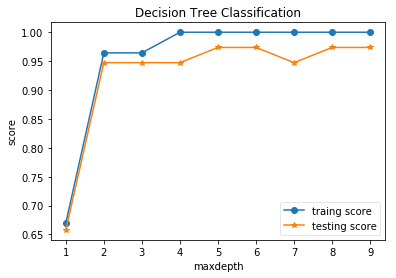

In [20]:
def test_DecisionTreeClassifier_depth(*data, maxdepth):
    '''
    预测性能随 max_depth 参数的影响
    '''
    X_train, X_test, y_train, y_test = data
    depths = np.arange(1, maxdepth)
    training_scores = []
    testing_scores = []
    for depth in depths:
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))

    ## 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(depths, training_scores, label="traing score", marker='o')
    ax.plot(depths, testing_scores, label="testing score", marker='*')
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Classification")
    ax.legend(framealpha=0.5, loc='best')
    plt.show()
    
test_DecisionTreeClassifier_depth(X_train, X_test, y_train, y_test, maxdepth=10)